<table style="width:100%; border-collapse: collapse;">
  <tr>
    <td style="width:20%; vertical-align:middle;">
      <img src="LogoUVG.png" width="400"/>
    </td>
    <td style="text-align:left; vertical-align:middle;">
      <h2 style="margin-bottom: 0;">Universidad del Valle de Guatemala - UVG</h2>
      <h3 style="margin-top: 0;">Facultad de Ingeniería - Computación</h3>
      <p style="font-size: 16px; margin-bottom: 0; margin-top: -20px">
        <strong>Curso:</strong> Visión por Computadora 
        <strong>Sección:</strong> 10
      </p>
      <p style="font-size: 16px; margin: 0;"><strong>Proyecto 3:</strong> Constructor de imágenes panorámicas</p>
      <br>
      <p style="font-size: 15px; margin: 0;"><strong>Autores:</strong></p>
      <ul style="margin-top: 5px; padding-left: 20px; font-size: 15px;">
        <li>Diego Alexander Hernández Silvestre - <strong>21270</strong></li>
        <li>Linda Inés Jiménez Vides - <strong>21169</strong></li>
        <li>José Andrés Auyón Cobar - <strong>201579</strong></li>
      </ul>
    </td>
  </tr>
</table>


#### Librerias 📚

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Inciso 1 🗂️

In [22]:
central = cv.imread('central.jpg')
left = cv.imread('left.jpg')
right = cv.imread('right.jpg')

Inciso 2 🗂️

In [23]:
sift = cv.SIFT_create()

# Central image SIFT keypoints
grayc = cv.cvtColor(central, cv.COLOR_BGR2GRAY)
kpc, desc = sift.detectAndCompute(grayc, None)
central=cv.drawKeypoints(grayc, kpc, central, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('CENTRAL_SIFT_KEYPOINTS.jpg',central)

# Left image SIFT keypoints
gray= cv.cvtColor(left, cv.COLOR_BGR2GRAY)
kpl, desl = sift.detectAndCompute(gray, None)
left=cv.drawKeypoints(gray, kpl, left, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('LEFT_SIFT_KEYPOINTS.jpg',left)

# Right image SIFT keypoints
gray= cv.cvtColor(right, cv.COLOR_BGR2GRAY)
kpr, desr = sift.detectAndCompute(gray, None)
right=cv.drawKeypoints(gray, kpr, right, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('RIGHT_SIFT_KEYPOINTS.jpg',right)

True

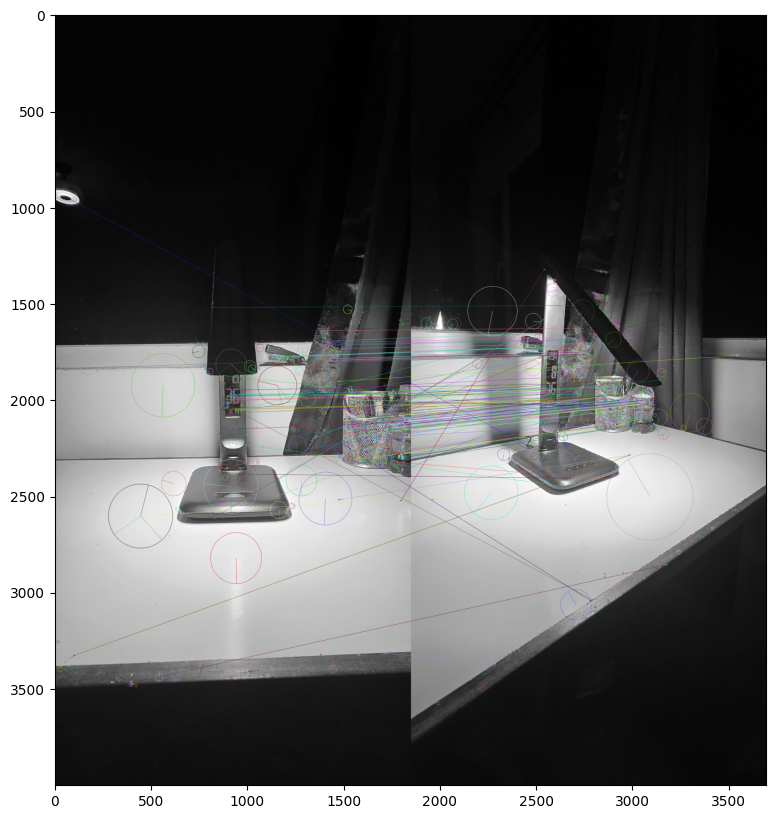

In [12]:
bf = cv.BFMatcher()
matches = bf.knnMatch(desc, desl, k=2)
 
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
 
matcherResult = cv.drawMatchesKnn(central, kpc, left, kpl, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.figure(figsize=(15, 10))
plt.imshow(matcherResult)
plt.show()

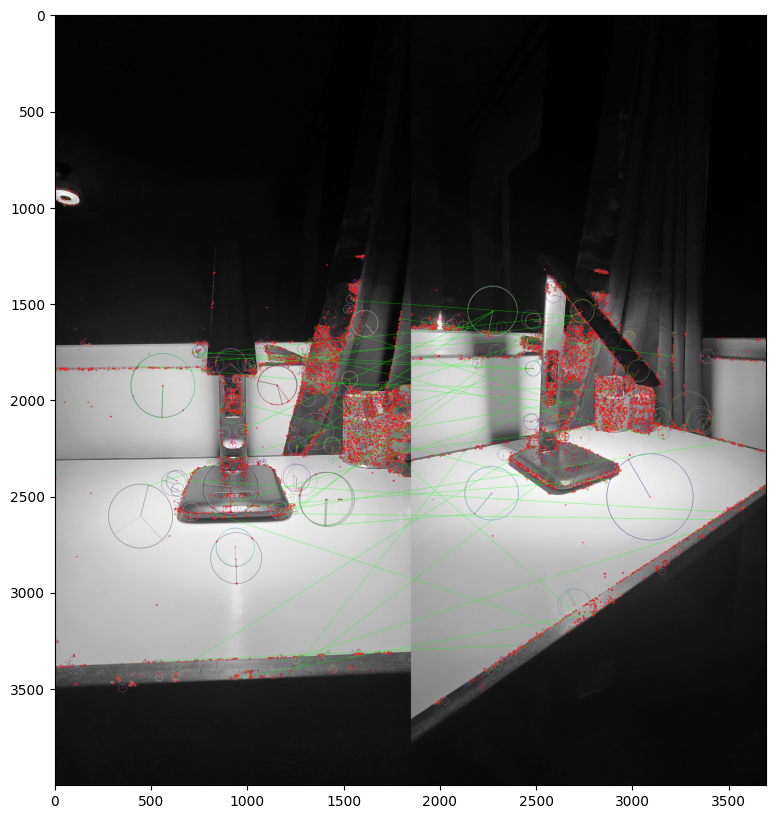

In [17]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
 
flann = cv.FlannBasedMatcher(index_params,search_params)
 
matches = flann.knnMatch(desc,desl,k=2)
 
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
 
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
 
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
 
img3 = cv.drawMatchesKnn(central, kpc, left, kpl,matches,None,**draw_params)
 
plt.figure(figsize=(15, 10))
plt.imshow(img3)
plt.show()

In [37]:
MIN_MATCH_COUNT = 10

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 100)
search_params = dict(checks=50) 
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(desc,desl,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [39]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kpc[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpl[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
 
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
 
    h, w = central.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
 
    left = cv.polylines(left,[np.int32(dst)],True,255,3, cv.LINE_AA)
 
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

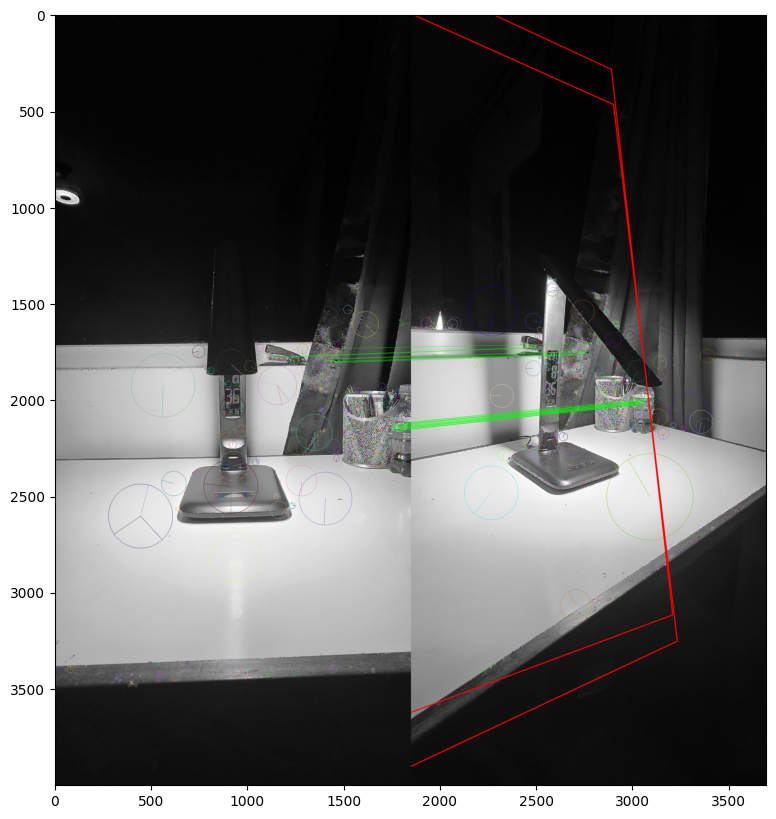

In [40]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv.drawMatches(central,kpc,left,kpl,good,None,**draw_params)

plt.figure(figsize=(15, 10))
plt.imshow(img3)
plt.show()

Inciso 3 🗂️

Inciso 4 🗂️